In [1]:
import wikipedia
import requests
from bs4 import BeautifulSoup
import warnings

%matplotlib inline

warnings.simplefilter(action='ignore', category=UserWarning)

# Scraping

In [2]:
origin = '/wiki/Jaguar_(disambiguation)'

In [3]:
neighbors = {}

In [4]:
def find_inner_links(page_link):
    soup = BeautifulSoup(requests.get('https://en.wikipedia.org'+page_link).text)
    links = []
    l = soup.find_all('li')
    for i in l:
        tmp = i.find_all('a')
        for ii in tmp:
            try:
                if '/wiki/' == ii['href'][0:6]:
                    links.append(ii['href'])
            except KeyError:
                pass
    return links

In [5]:
first_nodes = set(find_inner_links(origin))
neighbors[origin] = first_nodes

In [6]:
second_nodes = set()
for link in first_nodes:
    tmp = find_inner_links(link)
    neighbors[link] = tmp
    second_nodes = second_nodes.union(set(tmp))

In [7]:
nodes = first_nodes.union(second_nodes)
nodes.add(origin)

In [8]:
counter = 0
for link in second_nodes:
    counter += 1
    if counter % 100 == 0:
        print('{}/{}'.format(counter, len(second_nodes)))
    tmp = find_inner_links(link)
    neighbors[link] = list(set(tmp).intersection(nodes))

100/8745
200/8745
300/8745
400/8745
500/8745
600/8745
700/8745
800/8745
900/8745
1000/8745
1100/8745
1200/8745
1300/8745
1400/8745
1500/8745
1600/8745
1700/8745
1800/8745
1900/8745
2000/8745
2100/8745
2200/8745
2300/8745
2400/8745
2500/8745
2600/8745
2700/8745
2800/8745
2900/8745
3000/8745
3100/8745
3200/8745
3300/8745
3400/8745
3500/8745
3600/8745
3700/8745
3800/8745
3900/8745
4000/8745
4100/8745
4200/8745
4300/8745
4400/8745
4500/8745
4600/8745
4700/8745
4800/8745
4900/8745
5000/8745
5100/8745
5200/8745
5300/8745
5400/8745
5500/8745
5600/8745
5700/8745
5800/8745
5900/8745
6000/8745
6100/8745
6200/8745
6300/8745
6400/8745
6500/8745
6600/8745
6700/8745
6800/8745
6900/8745
7000/8745
7100/8745
7200/8745
7300/8745
7400/8745
7500/8745
7600/8745
7700/8745
7800/8745
7900/8745
8000/8745
8100/8745
8200/8745
8300/8745
8400/8745
8500/8745
8600/8745
8700/8745


In [11]:
s = 0
for i in neighbors.keys():
    s += len(neighbors[i])

In [12]:
print('Total number of nodes : {}'.format(len(nodes)))
print('Number of first nodes : {}'.format(len(first_nodes)))
print('Number of second nodes : {}'.format(len(second_nodes)))
print('Number of edges : {}'.format(s))

Total number of nodes : 8745
Number of first nodes : 73
Number of second nodes : 8745
Number of edges : 859184


# Network creation

In [3]:
import networkx as nx

## Saving

In [6]:
import pickle

def save_obj(obj, name ):
    with open('data/'+ name + '.pkl', 'wb') as f:
        pickle.dump(obj, f, pickle.HIGHEST_PROTOCOL)

def load_obj(name ):
    with open('data/' + name + '.pkl', 'rb') as f:
        return pickle.load(f)

In [ ]:
save_obj(nodes, 'nodes')
save_obj(first_nodes, 'first_nodes')
save_obj(second_nodes, 'second_nodes')
save_obj(neighbors, 'neighbors')

## Loading

In [7]:
nodes = load_obj('nodes')
first_nodes = load_obj('first_nodes')
second_nodes = load_obj('second_nodes')
neighbors = load_obj('neighbors')

In [8]:
nodes = list(nodes)
nodes[0]

'/wiki/File:Cathedral_(Siena)_-_Dome_interior.jpg'

In [9]:
#directed :
#g = nx.DiGraph(neighbors)

#undirected :
g = nx.Graph(neighbors)

In [45]:
adj = nx.adjacency_matrix(g)
adj

<8745x8745 sparse matrix of type '<class 'numpy.int64'>'
	with 1166629 stored elements in Compressed Sparse Row format>

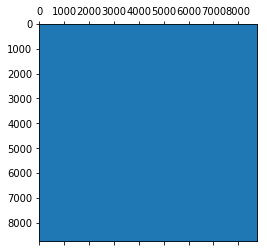

In [48]:
plt.spy(adj)

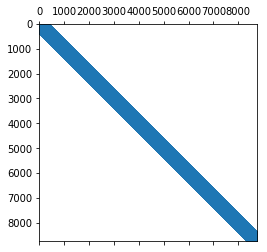

In [59]:
plt.spy(nx.laplacian_matrix(g), precision=1)

Check if it's symmetric :

In [11]:
(adj != adj.T)

<8745x8745 sparse matrix of type '<class 'numpy.bool_'>'
	with 0 stored elements in Compressed Sparse Row format>

In [12]:
edges = g.edges(nodes[0])
edges = list(edges)

In [13]:
len(edges)

16

In [14]:
real_edges = neighbors[nodes[0]]
real_edges

['/wiki/Special:SpecialPages',
 '/wiki/Portal:Contents',
 '/wiki/Special:Random',
 '/wiki/Wikipedia:File_Upload_Wizard',
 '/wiki/Portal:Current_events',
 '/wiki/File:Cathedral_(Siena)_-_Dome_interior.jpg',
 '/wiki/Special:MyContributions',
 '/wiki/Wikipedia:Community_portal',
 '/wiki/Main_Page',
 '/wiki/Help:Contents',
 '/wiki/Wikipedia:Featured_pictures',
 '/wiki/Special:MyTalk',
 '/wiki/Special:RecentChanges',
 '/wiki/Wikipedia:General_disclaimer',
 '/wiki/Portal:Featured_content',
 '/wiki/Wikipedia:About']

In [15]:
len(real_edges)

16

## Visualization

In [17]:
import matplotlib.pyplot as plt
import numpy as np

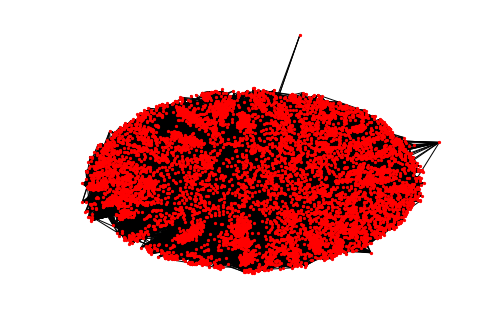

In [77]:
nx.draw(g, node_size=5)

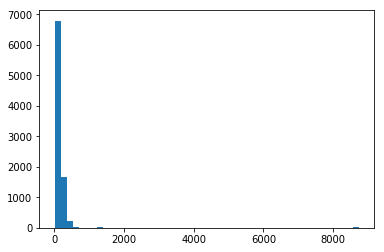

In [18]:
degrees = adj.sum(axis=1)

plt.hist(degrees, bins=50);

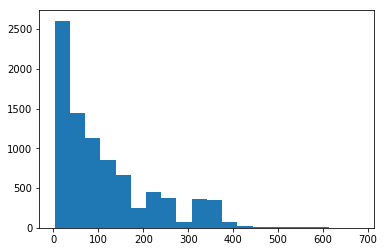

In [19]:
degrees_truncated = np.array(degrees)

degrees_truncated = degrees_truncated[degrees_truncated < 700]

plt.hist(degrees_truncated, bins=20);

## Laplacian

In [20]:
from scipy import sparse

In [41]:
laplacian = nx.laplacian_matrix(g, )
laplacian.dtype = float

/usr/local/lib/python3.5/dist-packages/matplotlib/axes/_axes.py:7321: RuntimeWarning: invalid value encountered in greater
  nonzero = np.abs(c.data) > precision


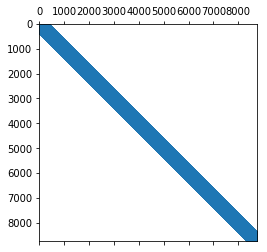

In [42]:
plt.spy(laplacian)

In [24]:
eigenvalues, eigenvectors = sparse.linalg.eigsh(laplacian, k=10, which='SM')

In [33]:
eigenvalues

array([ nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan])

In [32]:
np.linalg.matrix_rank(laplacian)

/usr/local/lib/python3.5/dist-packages/scipy/sparse/compressed.py:214: SparseEfficiencyWarning: Comparing a sparse matrix with 0 using == is inefficient, try using != instead.
  ", try using != instead.", SparseEfficiencyWarning)


1

In [40]:
laplacian.todense()

matrix([[  7.41098469e-323,   0.00000000e+000,   0.00000000e+000, ...,
           0.00000000e+000,   0.00000000e+000,   0.00000000e+000],
        [  0.00000000e+000,   1.48219694e-322,   0.00000000e+000, ...,
           0.00000000e+000,   0.00000000e+000,   0.00000000e+000],
        [  0.00000000e+000,   0.00000000e+000,   8.39911598e-323, ...,
           0.00000000e+000,   0.00000000e+000,   0.00000000e+000],
        ..., 
        [  0.00000000e+000,   0.00000000e+000,   0.00000000e+000, ...,
           8.69555537e-322,   0.00000000e+000,   0.00000000e+000],
        [  0.00000000e+000,   0.00000000e+000,   0.00000000e+000, ...,
           0.00000000e+000,   1.70946713e-321,               nan],
        [  0.00000000e+000,   0.00000000e+000,   0.00000000e+000, ...,
           0.00000000e+000,               nan,   1.72922976e-321]])